### Ejercicio 7

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
f = lambda x: 1 / (1 + 25*(x**2))

def interpolar(n):
    x = np.linspace(-1, 1, n+1)
    y = f(x)
    return x, y

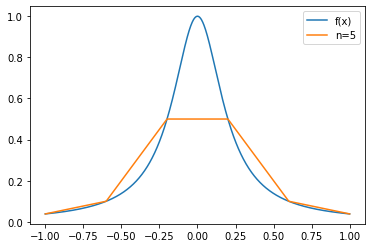

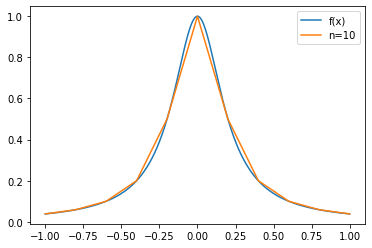

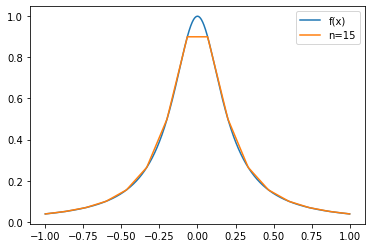

In [10]:
# plot the function
x = np.linspace(-1, 1, 1000)
y = f(x)

# plot the interpolation
x_10, y_10 = interpolar(5)
x_20, y_20 = interpolar(10)
x_30, y_30 = interpolar(15)

plt.plot(x, y, label='f(x)')
plt.plot(x_10, y_10, label='n=5')
plt.legend()
plt.show()

plt.plot(x, y, label='f(x)')
plt.plot(x_20, y_20, label='n=10')
plt.legend()
plt.show()

plt.plot(x, y, label='f(x)')
plt.plot(x_30, y_30, label='n=15')
plt.legend()
plt.show()
